In [3]:
import numpy as np
import pandas as pd   # importing to calculate numeric operation and for data manupulation

In [5]:
df = pd.read_csv('/Users/sagarbanjara/Desktop/Takeo/AmesHousing.csv')    # importing the dataset from the computer with path name

In [7]:
missing_values = df.isnull().sum()  #finding the missing values

In [9]:
# df = df.select_dtypes(exclude = 'bool')
df= df.select_dtypes(include=['int64', 'float64'])   #there are some boolean data types. removing the boolean

In [11]:
df.drop_duplicates(inplace = True)   # deleting the duplicate rows

In [13]:
df= df.dropna(axis=1, thresh=int(0.8 * len(df)))   #calculating the threshold

In [15]:
df.fillna(df.median(), inplace=True)      #filling missing values

In [17]:
df = pd.get_dummies(df, drop_first = True)     #converting category into numerical

In [19]:
x = df.drop("SalePrice", axis = 1)      # defining the value for x and y
y = df["SalePrice"]

In [21]:
from sklearn.model_selection import train_test_split      #importing the necessary environments
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)    #20% of data is used for testing
model = LinearRegression()         ##model we are supposed to use
model.fit(x_train,y_train)      #connecting relationship

LinearRegression()

In [23]:
print(x.dtypes.value_counts())       #checking the data types


int64      27
float64    11
Name: count, dtype: int64


In [24]:
predicting_house_price = model.predict(x_test)     #how to predict the house, in what basis

In [55]:
slope = model.coef_[0]           # shows the 
intercept = model.intercept_ 

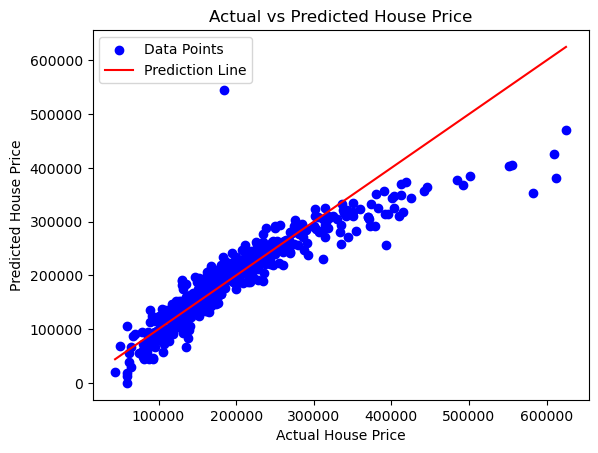

In [57]:
plt.scatter(y_test, predicting_house_price, color='blue', label='Data Points')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='-', label='Prediction Line')
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.title('Actual vs Predicted House Price')        #giving the specific name for x axis and y axis and title.
plt.legend()
plt.show()